In [1]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml 
from yaml.loader import UnsafeLoader
import os

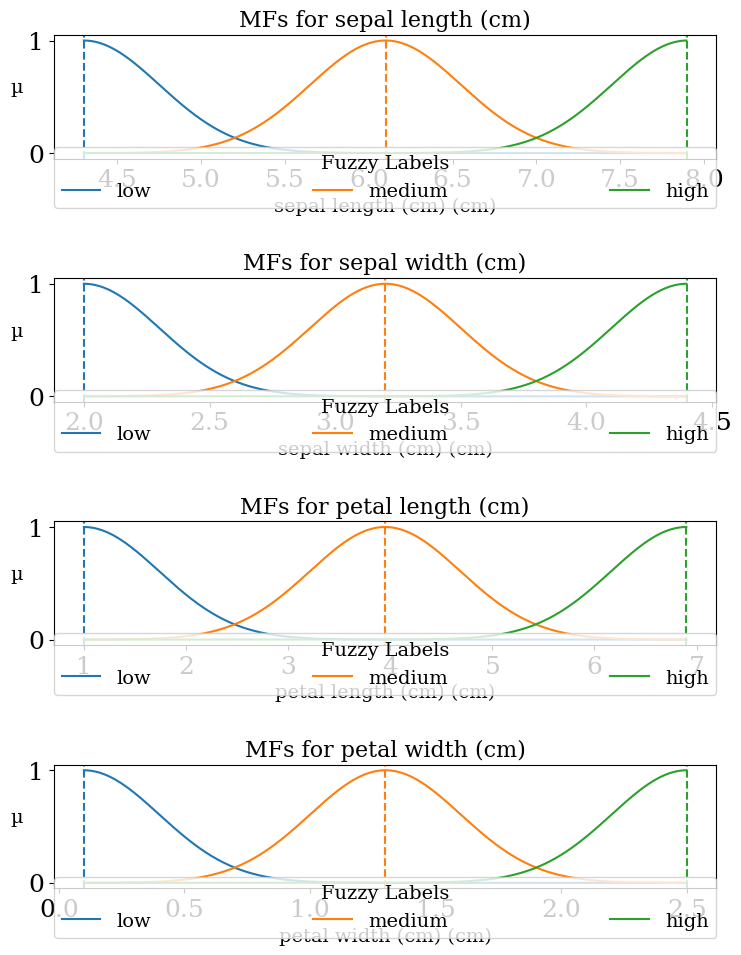

In [33]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_mfs = 3
mf_names = ["low", "medium", "high"]

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5 * (((x - center) / width) ** 2))
    return mu

min_vals = [4.3, 2.0, 1.0, 0.1]
max_vals = [7.9, 4.4, 6.9, 2.5]

centers = [4.3, 6.1, 7.9, 2.0, 3.2, 4.4, 1.0, 3.95, 6.9, 0.1, 1.3, 2.5]
widths = [0.45, 0.45, 0.45, 0.3, 0.3, 0.3, 0.7375, 0.7375, 0.7375, 0.3, 0.3, 0.3]

centers_tuned = [4.3, 6.704846154261173, 7.9, 2.0, 3.6010828440215126, 4.4, 1.0, 3.55364431399976, 6.9, 0.1, 1.0335289816510311, 2.5]
widths_tuned = [0.6022029347908475, 0.6032757097365787, 0.600860621908211, 0.40183876031762733, 0.4004111866011534, 0.407176726321751, 0.9833581724440803, 0.9843501545777336, 0.9849394498355075, 0.4004809656094499, 0.40114355348347314, 0.40233177014329013]

c = np.array_split(centers, len(feature_names))
w = np.array_split(widths, len(feature_names))
c_t = np.array_split(centers_tuned, len(feature_names))
w_t = np.array_split(widths_tuned, len(feature_names))

fig, axs = plt.subplots(len(feature_names), 1, figsize=(8, 10))

for xID, max_value in enumerate(max_vals):
    x = np.arange(min_vals[xID], max_value, max_value / 1000)
    
    for mfID in range(n_mfs):
        y = MF_gaussian(x, c[xID][mfID], w[xID][mfID])
        axs[xID].plot(x, y, label=mf_names[mfID])
        axs[xID].axvline(c[xID][mfID], 0, 1, c=axs[xID].lines[-1].get_color(), ls='--')

    axs[xID].legend(loc=(0.0, -0.4), title="Fuzzy Labels", mode="expand", borderaxespad=0, ncol=3, fontsize=14, title_fontsize=14)
    axs[xID].set_title(f'MFs for {feature_names[xID]}', fontsize=16)
    axs[xID].set_ylabel('µ', fontsize=14, rotation='horizontal', ha='right')
    axs[xID].set_xlabel(f'{feature_names[xID]} (cm)', fontsize=14)

plt.tight_layout()
plt.show()


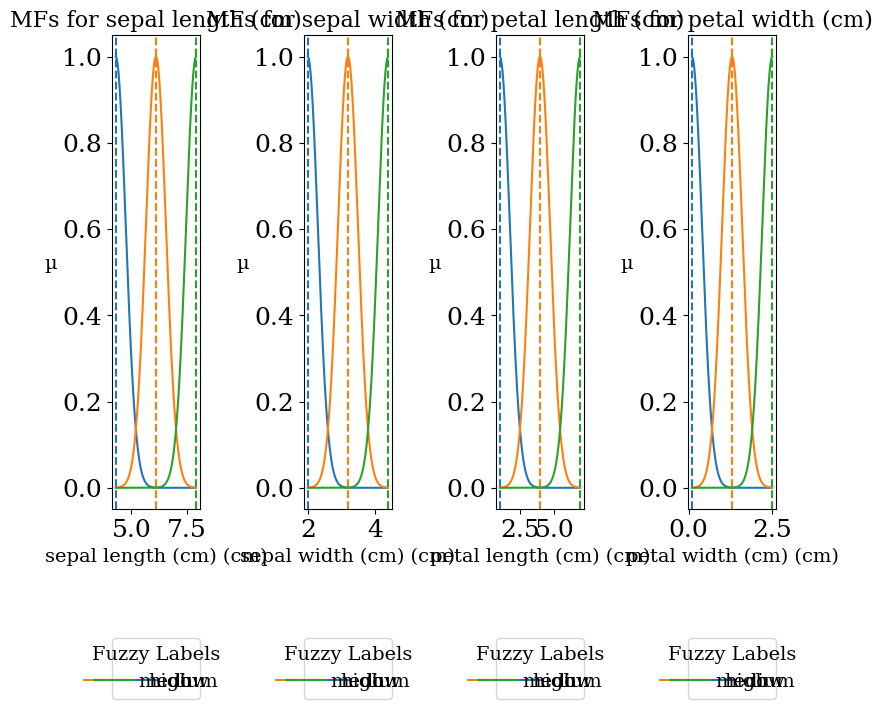

In [39]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_mfs = 3
mf_names = ["low", "medium", "high"]

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5 * (((x - center) / width) ** 2))
    return mu

min_vals = [4.3, 2.0, 1.0, 0.1]
max_vals = [7.9, 4.4, 6.9, 2.5]

centers = [4.3, 6.1, 7.9, 2.0, 3.2, 4.4, 1.0, 3.95, 6.9, 0.1, 1.3, 2.5]
widths = [0.45, 0.45, 0.45, 0.3, 0.3, 0.3, 0.7375, 0.7375, 0.7375, 0.3, 0.3, 0.3]

centers_tuned = [4.3, 6.704846154261173, 7.9, 2.0, 3.6010828440215126, 4.4, 1.0, 3.55364431399976, 6.9, 0.1, 1.0335289816510311, 2.5]
widths_tuned = [0.6022029347908475, 0.6032757097365787, 0.600860621908211, 0.40183876031762733, 0.4004111866011534, 0.407176726321751, 0.9833581724440803, 0.9843501545777336, 0.9849394498355075, 0.4004809656094499, 0.40114355348347314, 0.40233177014329013]

c = np.array_split(centers, len(feature_names))
w = np.array_split(widths, len(feature_names))
c_t = np.array_split(centers_tuned, len(feature_names))
w_t = np.array_split(widths_tuned, len(feature_names))

fig, axs = plt.subplots(1, len(feature_names), figsize=(8, 8))  # Set figsize for a horizontal layout

for xID, max_value in enumerate(max_vals):
    x = np.arange(min_vals[xID], max_value, max_value / 1000)
    
    for mfID in range(n_mfs):
        y = MF_gaussian(x, c[xID][mfID], w[xID][mfID])
        axs[xID].plot(x, y, label=mf_names[mfID])
        axs[xID].axvline(c[xID][mfID], 0, 1, c=axs[xID].lines[-1].get_color(), ls='--')

    axs[xID].legend(loc=(0.0, -0.4), title="Fuzzy Labels", mode="expand", borderaxespad=0, ncol=3, fontsize=14, title_fontsize=14)
    axs[xID].set_title(f'MFs for {feature_names[xID]}', fontsize=16)
    axs[xID].set_ylabel('µ', fontsize=14, rotation='horizontal', ha='right')
    axs[xID].set_xlabel(f'{feature_names[xID]} (cm)', fontsize=14)

plt.tight_layout()
plt.show()


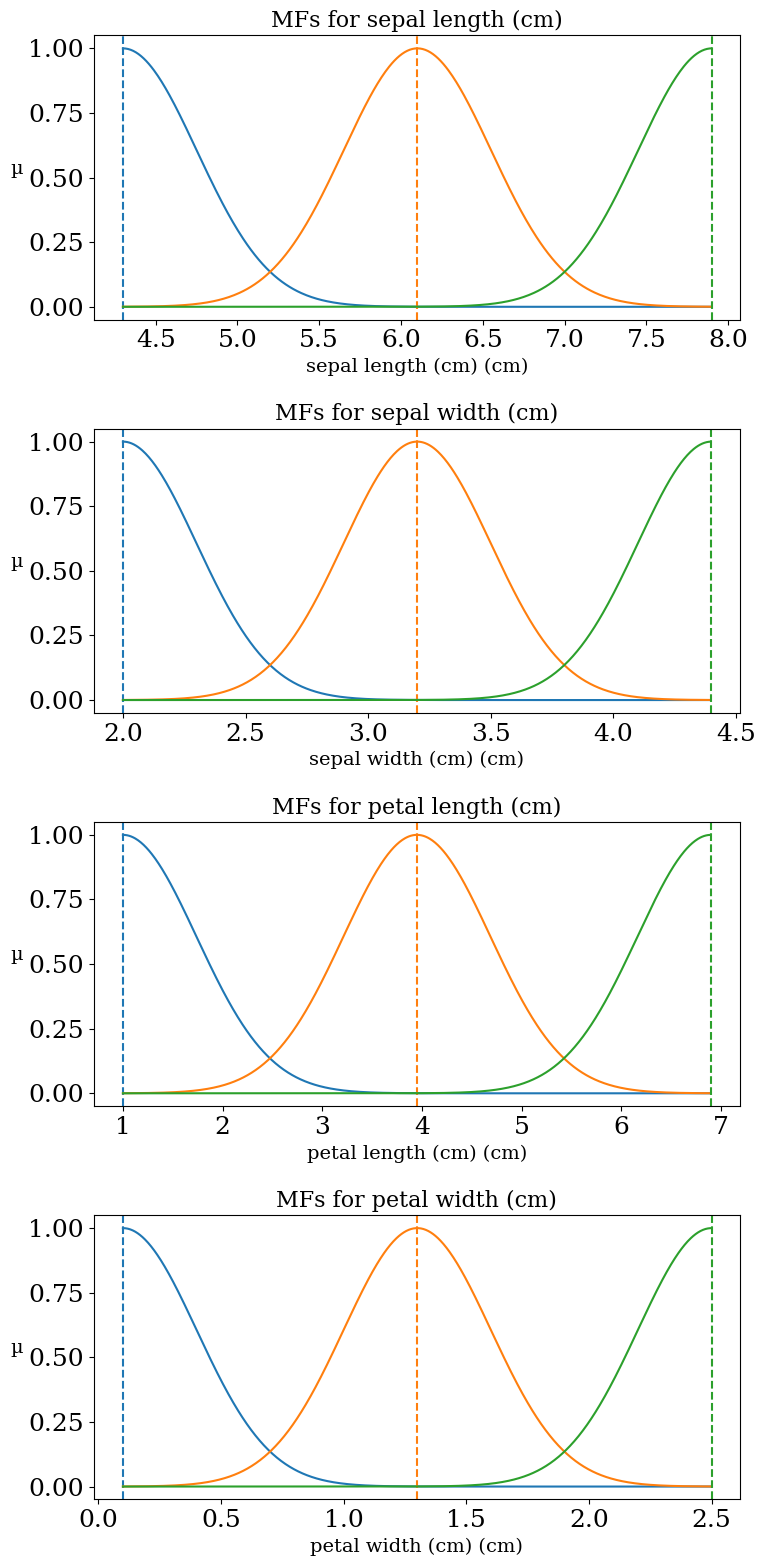

In [37]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_mfs = 3
mf_names = ["low", "medium", "high"]

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5 * (((x - center) / width) ** 2))
    return mu

min_vals = [4.3, 2.0, 1.0, 0.1]
max_vals = [7.9, 4.4, 6.9, 2.5]

centers = [4.3, 6.1, 7.9, 2.0, 3.2, 4.4, 1.0, 3.95, 6.9, 0.1, 1.3, 2.5]
widths = [0.45, 0.45, 0.45, 0.3, 0.3, 0.3, 0.7375, 0.7375, 0.7375, 0.3, 0.3, 0.3]

centers_tuned = [4.3, 6.704846154261173, 7.9, 2.0, 3.6010828440215126, 4.4, 1.0, 3.55364431399976, 6.9, 0.1, 1.0335289816510311, 2.5]
widths_tuned = [0.6022029347908475, 0.6032757097365787, 0.600860621908211, 0.40183876031762733, 0.4004111866011534, 0.407176726321751, 0.9833581724440803, 0.9843501545777336, 0.9849394498355075, 0.4004809656094499, 0.40114355348347314, 0.40233177014329013]

c = np.array_split(centers, len(feature_names))
w = np.array_split(widths, len(feature_names))
c_t = np.array_split(centers_tuned, len(feature_names))
w_t = np.array_split(widths_tuned, len(feature_names))

fig, axs = plt.subplots(len(feature_names), 1, figsize=(8, 16))  # Set figsize for a roughly squared layout

for xID, max_value in enumerate(max_vals):
    x = np.arange(min_vals[xID], max_value, max_value / 1000)
    
    for mfID in range(n_mfs):
        y = MF_gaussian(x, c[xID][mfID], w[xID][mfID])
        axs[xID].plot(x, y, label=mf_names[mfID])
        axs[xID].axvline(c[xID][mfID], 0, 1, c=axs[xID].lines[-1].get_color(), ls='--')

    #axs[xID].legend(loc=(0.0, -0.4), title="Fuzzy Labels", mode="expand", borderaxespad=0, ncol=3, fontsize=14, title_fontsize=14)
    axs[xID].set_title(f'MFs for {feature_names[xID]}', fontsize=16)
    axs[xID].set_ylabel('µ', fontsize=14, rotation='horizontal', ha='right')
    axs[xID].set_xlabel(f'{feature_names[xID]} (cm)', fontsize=14)

plt.tight_layout()
plt.show()


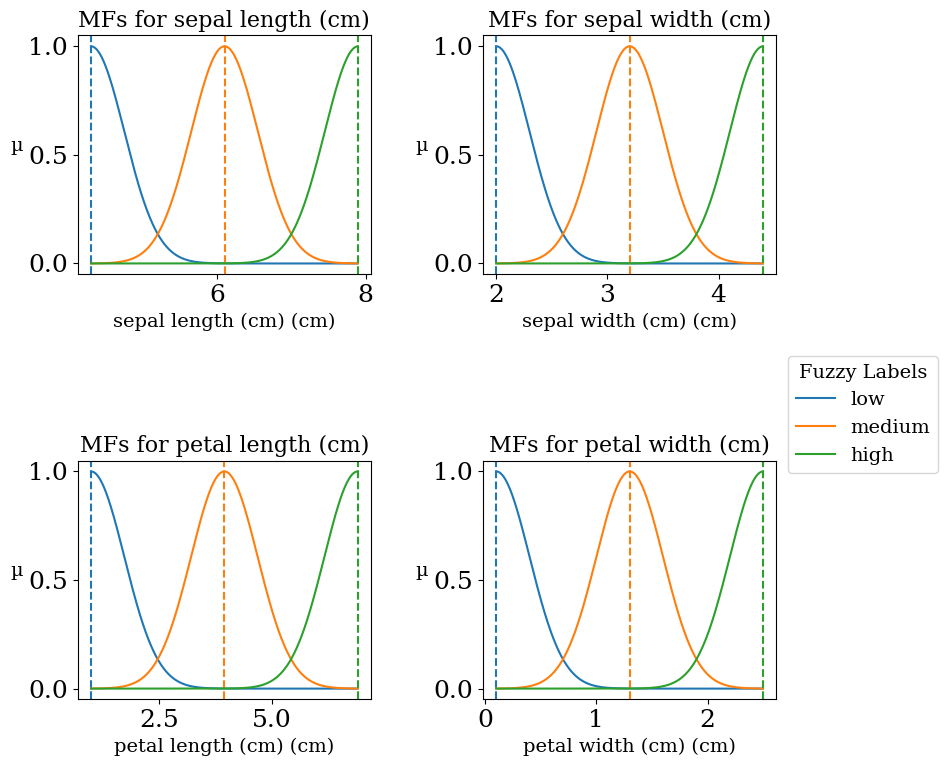

In [44]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_mfs = 3
mf_names = ["low", "medium", "high"]

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5 * (((x - center) / width) ** 2))
    return mu

min_vals = [4.3, 2.0, 1.0, 0.1]
max_vals = [7.9, 4.4, 6.9, 2.5]

centers = [4.3, 6.1, 7.9, 2.0, 3.2, 4.4, 1.0, 3.95, 6.9, 0.1, 1.3, 2.5]
widths = [0.45, 0.45, 0.45, 0.3, 0.3, 0.3, 0.7375, 0.7375, 0.7375, 0.3, 0.3, 0.3]

centers_tuned = [4.3, 6.704846154261173, 7.9, 2.0, 3.6010828440215126, 4.4, 1.0, 3.55364431399976, 6.9, 0.1, 1.0335289816510311, 2.5]
widths_tuned = [0.6022029347908475, 0.6032757097365787, 0.600860621908211, 0.40183876031762733, 0.4004111866011534, 0.407176726321751, 0.9833581724440803, 0.9843501545777336, 0.9849394498355075, 0.4004809656094499, 0.40114355348347314, 0.40233177014329013]

c = np.array_split(centers, len(feature_names))
w = np.array_split(widths, len(feature_names))
c_t = np.array_split(centers_tuned, len(feature_names))
w_t = np.array_split(widths_tuned, len(feature_names))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Set figsize for a 2x2 grid layout

for xID, max_value in enumerate(max_vals):
    x = np.arange(min_vals[xID], max_value, max_value / 1000)
    row = xID // 2
    col = xID % 2
    
    for mfID in range(n_mfs):
        y = MF_gaussian(x, c[xID][mfID], w[xID][mfID])
        axs[row, col].plot(x, y, label=mf_names[mfID])
        axs[row, col].axvline(c[xID][mfID], 0, 1, c=axs[row, col].lines[-1].get_color(), ls='--')

    #axs[row, col].legend(loc=(0.0, -0.4), title="Fuzzy Labels", mode="expand", borderaxespad=0, ncol=3, fontsize=14, title_fontsize=14)
    axs[row, col].set_title(f'{feature_names[xID]}', fontsize=16)
    axs[row, col].set_ylabel('µ', fontsize=14, rotation='horizontal', ha='right')
    axs[row, col].set_xlabel(f'{feature_names[xID]} (cm)', fontsize=14)

plt.legend(loc=(1.04, 0.950), title="Fuzzy Labels", fontsize=14, title_fontsize=14)
plt.title("MF")
plt.tight_layout()
plt.show()


Text(0.5, 0, ' petal width (cm) (cm)')

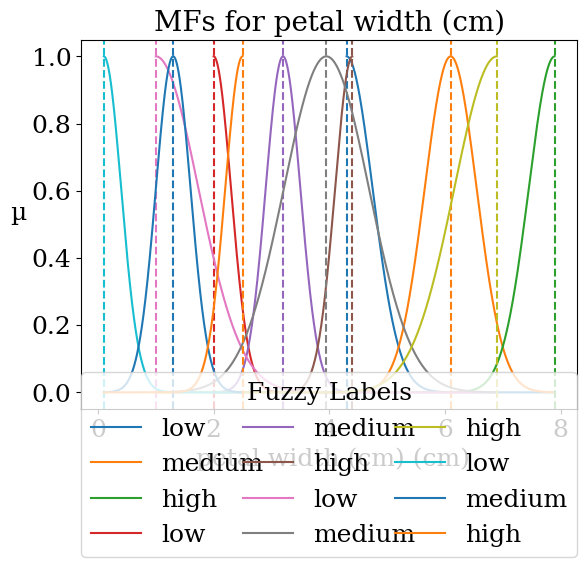

In [30]:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_mfs = 3
mf_names  = ["low", "medium", "high"]

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5*(((x-center)/width)**2))
    
    return mu

min_vals = [4.3
, 2.0
,1.0
, 0.1]

max_vals =[7.9
,4.4
,6.9
,2.5]

centers =[4.3
,6.1
,7.9
,2.0
,3.2
,4.4
,1.0
,3.95
,6.9
,0.1
,1.3
,2.5]




widths = [0.45000000000000007
,0.45000000000000007
,0.45000000000000007
,0.30000000000000004
,0.30000000000000004
,0.30000000000000004
,0.7375
,0.7375
,0.7375
,0.3
,0.3
,0.3
]

centers_tuned = [ 4.3
,6.704846154261173
,7.9
,2.0
,3.6010828440215126
,4.4
,1.0
,3.55364431399976
, 6.9
, 0.1
, 1.0335289816510311
, 2.5]



widths_tuned = [ 0.6022029347908475
,0.6032757097365787
,0.600860621908211
, 0.40183876031762733
, 0.4004111866011534
, 0.407176726321751
, 0.9833581724440803
, 0.9843501545777336
, 0.9849394498355075
, 0.4004809656094499
, 0.40114355348347314
, 0.40233177014329013]



c = np.array_split(centers, len(feature_names)) # hc
# print("HERE", c)

w = np.array_split(widths, len(feature_names)) # hc


c_t = np.array_split(centers_tuned, len(feature_names)) # hc

w_t = np.array_split(widths_tuned, len(feature_names)) # hc
#print("max", max_vals)

# print("c", c)
#print("w", w)
#  length_inputs = tf.shape(layer.centers)[0]
# for each input see what the mfs mean -> domain input might be diff
for xID, max_value in enumerate(max_vals):
#for name, input in zip(names,layer.inputs):
#        x = np.arange(0, means[xID] , (means[xID]*0.01))
    x = np.arange(min_vals[xID], max_value, max_value/1000)
    y = {}

    for mfID in range(n_mfs):
        y[mfID] = []

#            print(layer.centers[j+i*layer.n_mfs])
        #   for bleh in x:
            #  print(c[xID])
            #  print(c[xID][mfID])
        y[mfID] =MF_gaussian(x,c[xID][mfID],w[xID][mfID])

        # print("x", x)
        #print("y,", y[mfID])
        plt.plot(x, y[mfID], label=mf_names[mfID])

        #  print("hui", c[xID][mfID])
        plt.axvline(c[xID][mfID],0,1, c=plt.gca().lines[-1].get_color(), ls='--')


    # plt.legend( title="Fuzzy Labels",# bbox_to_anchor=( 1, 0.2), 
    #        fontsize=18,  title_fontsize=18)
    

    plt.legend(loc=(0.0, -0.4), title="Fuzzy Labels",# bbox_to_anchor=( 1, 0.2), 
            mode="expand", borderaxespad=0, ncol=3, fontsize=18,  title_fontsize=18)


    plt.title(f'MFs for {feature_names[xID]}', fontsize=20)
    plt.ylabel('µ', fontsize=18,  rotation='horizontal', ha='right')
    plt.xlabel(f' {feature_names[xID]} (cm)', fontsize=18)

In [2]:
def center_init(x, n_mfs):
    """Initializes the centers of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the domain
        n_mfs (int): number of MFs in Fuzzification Layer
        
    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
   # n_inputs = x.size // n_mfs
    multiplicator = np.tile(np.arange(0, n_mfs ), 1)
    cetnters = (x / (n_mfs -1)) * multiplicator
  #  print(cetnters)
    return cetnters


def widths_init(x, n_mfs):
    """Initializes the widths of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the feature's domain
        n_mfs (int): number of MFs in Fuzzification Layer

    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
    return np.repeat(x/(2*n_mfs+1), n_mfs)   

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5*(((x-center)/width)**2))
    
    return mu

centers [0.14285714 0.14285714 0.14285714]
honk 0.14285714285714285
honk 0.14285714285714285
honk 0.14285714285714285


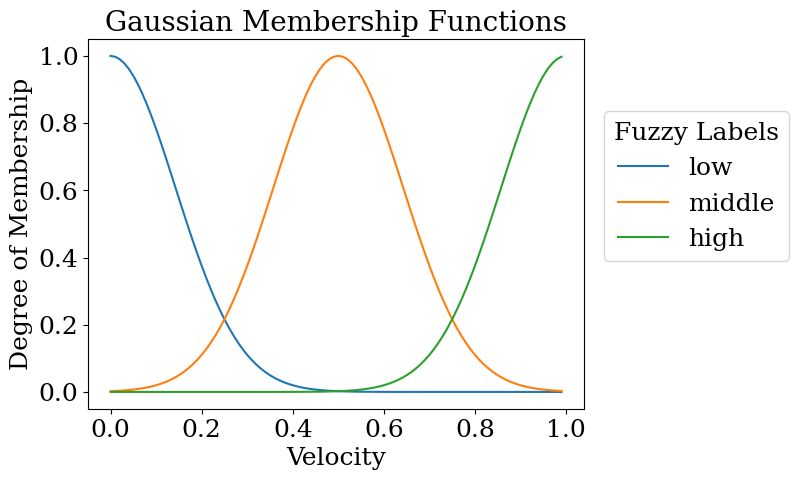

In [27]:
# from cycler import cycler

# line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
#                  cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
# marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
#                  cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
#                  cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# # matplotlib's standard cycler
# standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# plt.rc("axes", prop_cycle=line_cycler)

# plt.rc("text", usetex=True)
# #plt.rc("text.latex", preamble=r"\usepackage{newpxtext}\usepackage{newpxmath}\usepackage{commath}\usepackage{mathtools}")
# plt.rc("font", family="serif", size=18.)

plt.rc("font", family="serif")

 

max_vals = 1
centers = center_init(1,3)

widths = widths_init(1,3)
print("centers", widths)

centers_tuned = [ 4.3
,6.704846154261173
,7.9
,2.0
,3.6010828440215126
,4.4
,1.0
,3.55364431399976
, 6.9
, 0.1
, 1.0335289816510311
, 2.5]



widths_tuned = [ 0.6022029347908475
,0.6032757097365787
,0.600860621908211
, 0.40183876031762733
, 0.4004111866011534
, 0.407176726321751
, 0.9833581724440803
, 0.9843501545777336
, 0.9849394498355075
, 0.4004809656094499
, 0.40114355348347314
, 0.40233177014329013]



def visuMFs( max_value, mf_names=["low", "middle", "high"]):
    """Visualizing the current MFs
visuMFs(inputMFs, self.arc, dir="before_training", func="inputMFs")
inputMFs.mf_type, inputMFs.n_mfs, inputMFs.centers, inputMFs.widths, inputMFs.domain_input, 
Args:
        type_mf (callable): MF
        n_mfs (int): number of MFs
        centers (tensor): centers of MFs
        widths (tensor): widths of MF
        domain_input (int): upper boundary of the domain of the input 
        file_name (str): name of plot that will be saved in analysis folder 
    """
    n_mfs = 3
    


    x = np.arange(0, max_value, 0.01)
    y = {}
    z = {}

    for mfID in range(n_mfs):
        print("honk",widths[mfID])
        y[mfID] = []#MF_gaussian(x,centers[mfID],widths[mfID])
        z[mfID] = []

        for bleh in x:
             y[mfID].append(MF_gaussian(bleh,centers[mfID],widths[mfID]))
             #z[mfID].append(MF_gaussian(bleh,centers_tuned[mfID],widths_tuned[mfID]))

        plt.plot(x, y[mfID], label=mf_names[mfID])
       # plt.plot(x, z[mfID], label=mf_names[mfID])

        #  print("hui", c[xID][mfID])
      #  plt.axvline(0.3,0,0.39, c="red", ls='--')


        # plt.legend(loc=(0.0, -0.4), title="Fuzzy Labels",# bbox_to_anchor=( 1, 0.2), 
        #         mode="expand", borderaxespad=0, ncol=3, fontsize=18,  title_fontsize=18)#, **csfont)
        
        plt.legend(loc=(1.04, 0.4), title="Fuzzy Labels",# bbox_to_anchor=( 1, 0.2), 
               fontsize=18,  title_fontsize=18)

        plt.title('Gaussian Membership Functions', fontsize=20)
        plt.ylabel('Degree of Membership', fontsize=18)
        plt.xlabel("Velocity",  fontsize=18)
    #plt.savefig("myimage.jpg", dpi=1200)
    return plt



      
plt = visuMFs(max_vals)
#plt.figure(figsize=(10,6))
plt.savefig("myimage.jpg", dpi=1200)
plt.show()